## missing value
to handle missing values we clean the dataset in which we either

filling null values with logically format, mean, median , mode or any other patterns appears in dataset

or we delete the rows who has missing values


Understanding **why** data is missing is crucial for choosing the right imputation or modeling strategy. Let’s break down the three types of missing data in **simple, real-world terms**:

---

### 1️⃣ **MCAR – Missing Completely at Random**

🧠 **What it means:**  
The missing data has **nothing to do** with any other data in the dataset — it's just random.

🎯 **Analogy:**  
Imagine you're conducting a survey, and some people accidentally skip a question because the page got smudged during printing. The missing answers have **no pattern** — they’re just random accidents.

📌 **Key Point:**  
- No bias is introduced.
- Safe to drop or impute without worrying about skewing results.

---

### 2️⃣ **MAR – Missing At Random**

🧠 **What it means:**  
The missing data is **not random**, but the reason it's missing is related to **other variables** in the dataset — not the missing value itself.

🎯 **Analogy:**  
Suppose in a health survey, **younger people** are less likely to report their income. The missing income values depend on **age**, which is available.

📌 **Key Point:**  
- You can use other known variables to **predict or impute** the missing values.
- Common in real-world datasets.

---

### 3️⃣ **MNAR – Missing Not At Random**

🧠 **What it means:**  
The missing data is **not random**, and the reason it's missing is related to the **value itself** — the thing that’s missing.

🎯 **Analogy:**  
In a mental health survey, people with **severe depression** might be less likely to answer questions about their mood. The missingness is **because of** the very thing you're trying to measure.

📌 **Key Point:**  
- Tricky to handle — you can’t fix it just by looking at other variables.
- May need domain knowledge or special modeling techniques.

---

### 🧠 Quick Summary Table

| Type  | Full Form                        | Missingness Depends On | Example |
|-------|----------------------------------|-------------------------|---------|
| MCAR  | Missing Completely At Random     | Nothing (pure chance)   | Skipped question due to printing error |
| MAR   | Missing At Random                | Other observed data     | Income missing for younger people |
| MNAR  | Missing Not At Random            | The missing value itself| Mood not reported due to depression |

---

Let me know if you want a dry-run challenge or a portfolio-ready notebook that demonstrates how to detect and handle these types in Python using `pandas` and `missingno`.


In [2]:
import seaborn as sns

df=sns.load_dataset('titanic')


In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
## check the missing values

df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
### way to remove the missing value
## drop the row


df.shape

(891, 15)

In [9]:
df.dropna().shape

(182, 15)

In [15]:
## column wise
df.dropna(axis=1).shape


(891, 11)

Absolutely, Keshavraj — here’s a crisp, **interview-ready breakdown** of imputation techniques, tailored for both **conceptual clarity** and **practical application** in Data Science or QA Automation roles:

---

## 🎯 What is Imputation?

**Imputation** is the process of **filling in missing values** in a dataset so that models can be trained without errors or bias. Interviewers often test your understanding of **when**, **why**, and **how** to apply different techniques.

---

## 🔍 Types of Imputation Techniques

### 1️⃣ **Mean/Median/Mode Imputation**
- **When to use:** For **numerical** or **categorical** features with **MCAR or MAR** missingness.
- **How it works:**
  - Mean → for symmetric distributions
  - Median → for skewed distributions
  - Mode → for categorical variables

✅ **Example:**
```python
df['age'].fillna(df['age'].mean(), inplace=True)
```

🧠 **Interview Tip:** Mention that this is fast but may **underestimate variance** and distort distributions.

---

### 2️⃣ **Constant/Arbitrary Value Imputation**
- **When to use:** When you want to **flag missingness** explicitly.
- **How it works:** Replace missing values with a fixed value (e.g., -999, "Unknown").

✅ **Example:**
```python
df['salary'].fillna(-999, inplace=True)
```

🧠 **Interview Tip:** Say this is useful for **tree-based models** that can learn from the placeholder.

---

### 3️⃣ **Forward/Backward Fill (Time Series)**
- **When to use:** For **time-dependent** data like stock prices or sensor readings.
- **How it works:**
  - `ffill()` → fills missing value with the **previous** value
  - `bfill()` → fills with the **next** value

✅ **Example:**
```python
df['temperature'].fillna(method='ffill', inplace=True)
```

🧠 **Interview Tip:** Emphasize that this assumes **temporal continuity**, which may not always be valid.

---

### 4️⃣ **K-Nearest Neighbors (KNN) Imputation**
- **When to use:** When missingness depends on **similar rows**.
- **How it works:** Finds K similar rows (based on other features) and imputes using their values.

✅ **Example (using sklearn):**
```python
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_imputed = imputer.fit_transform(df)
```

🧠 **Interview Tip:** Mention it **preserves relationships** but is **computationally expensive**.

---

### 5️⃣ **Multivariate Imputation (MICE)**
- **When to use:** When multiple features have missing values and are **interdependent**.
- **How it works:** Iteratively models each feature with missing values as a function of others.

✅ **Example (using fancyimpute or sklearn.experimental):**
```python
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer()
df_imputed = imp.fit_transform(df)
```

🧠 **Interview Tip:** Say this is **statistically robust** but requires **careful tuning** and **assumptions**.

---

### 6️⃣ **Model-Based Imputation**
- **When to use:** When you want to **predict missing values** using a trained model.
- **How it works:** Train a regression/classification model on complete cases to predict missing ones.

🧠 **Interview Tip:** Mention this is **customizable** and **powerful**, but risks **data leakage** if not handled properly.

---

## 🧠 Bonus: When NOT to Impute
- If the missingness is **MNAR**, imputation may introduce bias.
- Sometimes, **dropping rows/columns** is better if missingness is high and random.

---

## 🚀 Interview-Ready Summary

| Technique                | Best For                      | Pros                          | Cons                          |
|--------------------------|-------------------------------|-------------------------------|-------------------------------|
| Mean/Median/Mode         | MCAR/MAR, numeric/categorical | Simple, fast                  | Distorts variance             |
| Constant/Arbitrary       | Categorical, flagging missing | Easy to implement             | May mislead models            |
| Forward/Backward Fill    | Time series                   | Preserves temporal order      | Assumes continuity            |
| KNN Imputation           | Structured data               | Captures local patterns       | Slow on large datasets        |
| MICE                     | Multivariate missingness      | Statistically sound           | Complex, slower               |
| Model-Based              | Predictive imputation         | High accuracy                 | Risk of overfitting/leakage   |

---

Would you like a **dry-run interview question** on this or a **portfolio-ready notebook** demonstrating these techniques on a real dataset like Titanic or Housing Prices?


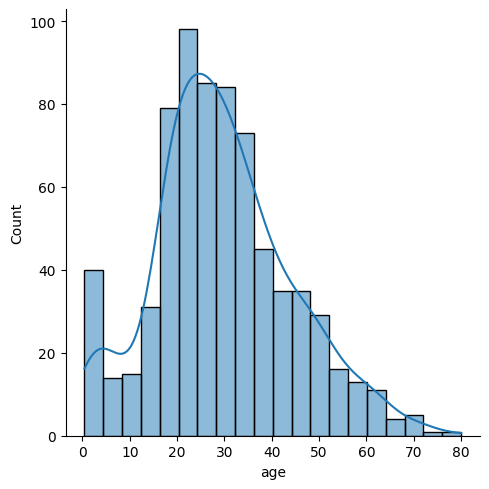

In [ ]:
## imputation technuques
# 1. mean value imputation
# works well when we have normally distributed data


sns.displot(df['age'], kde=True)

In [22]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [23]:
df[['age','age_mean']]

,age,age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


In [25]:
# 2. median value imputation
## if we have outliers in dataset

df['age_median']=df['age'].fillna(df['age'].median())

In [26]:
df[['age', 'age_median']]

,age,age_median
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,28.0
889,26.0,26.0


In [27]:
## 3 mode imputation techniques

df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_median,age_mean
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [28]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]
print(mode_value)
df['embarked'].fillna(mode_value)

S


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [52]:
## SMOTE (synthetic oversampling technique )
## it is a upsampling technique 

from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000, n_features=2, n_clusters_per_class=1, weights=[0.90],random_state=12, n_redundant=0)


In [53]:
import pandas as pd

df=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df,df2], axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


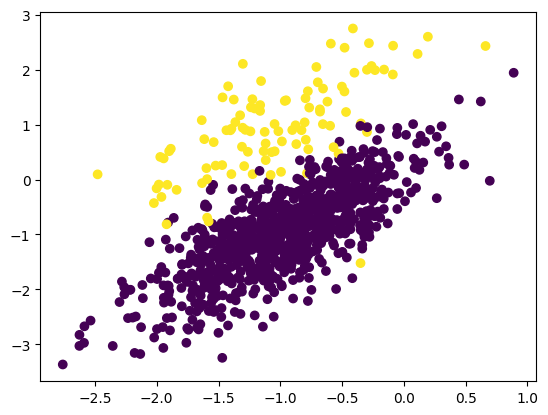

In [54]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [41]:
!pip install imblearn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 2.1 MB/s eta 0:00:04
   -------- ------------------------------- 1.8/8.7 MB 4.8 MB/s eta 0:00:02
   -------------- ------------------------- 3.1/8.7 MB 5.3 MB/s eta 0:00:02
   -------------------- ------------------- 4.5/8.7 MB 5.7 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.7 MB 6.0 MB/s eta 0:00:01
   --------------------------------- ------ 7.3/8.7 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 6.1 MB/s eta 0:00:00

  Attempting uninstall: scikit-learn

    Found existing installation: scikit-learn 1.4.1.post1

   ---------------------------------------- 0/3 [scikit-learn]
    Uninstalling scikit-learn-1.4.1.post1:
   ---------------------------------------- 0/3 [scikit-learn]
      Successfully uninstalled scikit-learn-1.4.1.post1


  You can safely remove it manually.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:

from imblearn.over_sampling import SMOTE


ImportError: cannot import name '_max_precision_float_dtype' from 'sklearn.utils._array_api' (c:\Users\Keshavraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py)

In [45]:
!pip show scikit-learn
!pip install scikit-learn==1.2.2

Name: scikit-learn
Version: 1.7.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License-Expression: BSD-3-Clause
Location: C:\Users\Keshavraj\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn, seqeval, simpletransformers
     ---------------------------------------- 0.0/7.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.3 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.3 MB ? eta -:--:--
     -- ------------------------------------- 0.5/7.3 MB 1.5 MB/s eta 0:00:05
     ---- ----------------------------------- 0.8/7.3 MB 1.5 MB/s eta 0:00:05
     ----- ---------------------------------- 1.0/7.3 MB 1.5 MB/s eta 0:00:05
     ------- -------------------------------- 1.3/7.3 MB 1.3 MB/s eta 0:00:05
     ------- -------------------------------- 1.3/7.3 MB 1.3 MB/s eta 0:00:05
     ---

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "C:\Users\Keshavraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
        File "C:\Users\Keshavraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\Keshavraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 175, in prepare_metadata_for_build_wheel
          return hook(metadata_directory, config_settings)
                

In [56]:
!pip install -U imbalanced-learn simpletransformers


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
from imblearn.over_sampling import SMOTE


ImportError: cannot import name '_max_precision_float_dtype' from 'sklearn.utils._array_api' (c:\Users\Keshavraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py)

In [50]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
